# 1. 单变量的线性方程
以 y = 7.0 * x +2.9 为例

# 2. 准备数据
通过生成人工数据集：
随机生成一个近似采样随机分布，使得 w = 7.0, b = 2.9, 并加入一个噪声，噪声的最大振幅为0.6

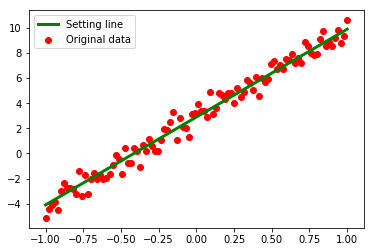

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x_data = np.linspace(-1, 1, 100)  # 生成-1到1之间的100个等差数列点
y_data = 7.0 * x_data + 2.9 + np.random.randn(*x_data.shape) * 0.6  # y = 7.0x + 2.9 + 噪声
plt.scatter(x_data, y_data, label="Original data", color="red")
plt.plot(x_data, 7.0 * x_data + 2.9, label="Setting line", color="green", linewidth="3")
plt.legend()  # 显示图例
plt.show()  # 显示图表

# 3. 构建模型

In [2]:
# 定义训练数据的占位符， x是特征值， y是标签值
x = tf.placeholder(tf.float32, name="x")
y = tf.placeholder(tf.float32, name="y")


# 定义模型函数 y = w * x+ b
def model(x, w, b):
    return tf.multiply(x, w) + b


w = tf.Variable(0.5, name="w0")     # 定义线性函数的斜率
b = tf.Variable(0.1, name="b0")     # 定义线性函数的截距
pred = model(x, w, b)               # 定义线性函数的预测值

Instructions for updating:
Colocations handled automatically by placer.


# 4. 训练模型

Instructions for updating:
Use tf.cast instead.


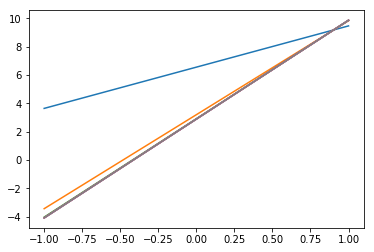

In [3]:
train_epochs = 8        # 设置迭代次数
learning_rate = 0.05    # 学习率 步长

# 采用均方差作为损失函数
loss_function = tf.reduce_mean(tf.square(y - pred))

# 梯度下降优化器 设置学习率和优化目标损失最小化
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

sess = tf.Session()  # 建立会话
init = tf.global_variables_initializer()  # 变量初始化
sess.run(init)

# 迭代训练
for epoch in range(train_epochs):
    for xs, ys in zip(x_data, y_data):
        _, loss = sess.run([optimizer, loss_function], feed_dict={x: xs, y: ys})
    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    plt.plot(x_data, w0temp * x_data + b0temp)
plt.show()  # 显示图表

In [4]:
# 查看权重
print("w:", sess.run(w))
print("b:", sess.run(b))

w: 6.9775567
b: 2.8976731


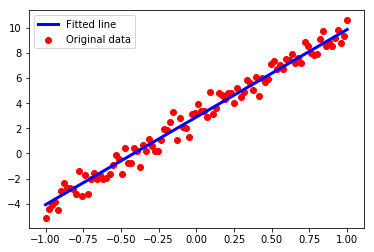

In [5]:
# 结果可视化
plt.scatter(x_data, y_data, label="Original data", color="red")
plt.plot(x_data, x_data * sess.run(w) + sess.run(b), label="Fitted line", color="Blue", linewidth="3")
plt.legend()  # 显示图例
plt.show()  # 显示图表

# 5. 模型预测

In [6]:
x_test = 6.28  # 测试值

# 模型预测
predict = sess.run(pred, feed_dict={x: x_test})
print("预测值：%f" % predict)

target = 7.0 * x_test + 2.9
print("目标值：%f" % target)

预测值：46.716732
目标值：46.860000
